In [296]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [297]:
image = mpimg.imread('test.jpg')
print(image.shape)
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

(300, 620, 3)


In [298]:
red_threshold = 200
green_threshold = 200
blue_threshold = 100

In [299]:
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [300]:
left_bottom = [5, 299]
right_bottom = [618, 299]
apex = [309, 45]

In [301]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [302]:
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

In [303]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [304]:
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

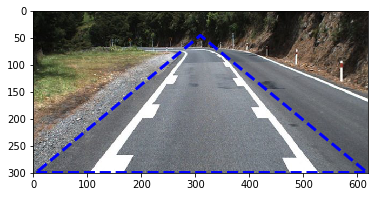

In [305]:
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=3)

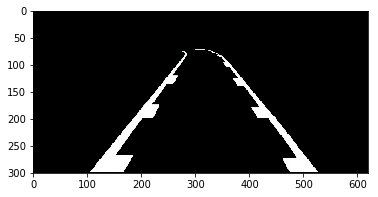

In [306]:
plt.imshow(color_select)

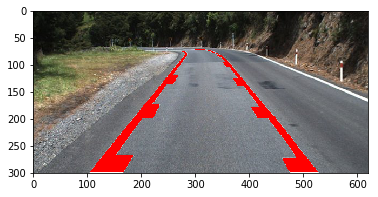

In [307]:
plt.imshow(line_image)